In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
image = cv2.imread('./testing images/test_2.jpg')

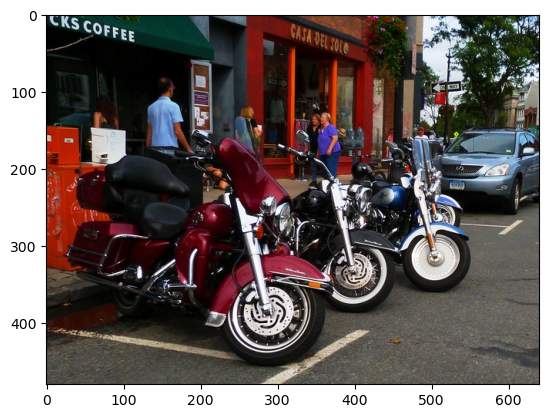

In [3]:
plt.imshow(image[:,:,::-1])

In [4]:
model = cv2.dnn.readNetFromDarknet('./Files/yolov3.cfg' , './Files/yolov3.weights')
model

< cv2.dnn.Net 00000213DA9E3E10>

In [5]:
classes = []
k = open('./Files/class_names','r')
for i in k.readlines():
    classes.append(i.strip())
classes

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'street sign',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'hat',
 'backpack',
 'umbrella',
 'shoe',
 'eye glasses',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'plate',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'mirror',
 'dining table',
 'window',
 'desk',
 'toilet',
 'door',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'blender',
 'book',
 'clock',
 'vase',
 'scis

In [6]:
blob = cv2.dnn.blobFromImage(image , 1/255 , (320,320),True,crop = False)
blob

array([[[[0.3529412 , 0.21176472, 0.20784315, ..., 0.34117648,
          0.41960788, 0.3137255 ],
         [0.38431376, 0.20392159, 0.3803922 , ..., 0.6745098 ,
          0.76470596, 0.627451  ],
         [0.427451  , 0.18431373, 0.5254902 , ..., 0.9215687 ,
          0.7058824 , 0.5137255 ],
         ...,
         [0.30588236, 0.32156864, 0.29411766, ..., 0.3254902 ,
          0.3647059 , 0.28235295],
         [0.27450982, 0.28627452, 0.2392157 , ..., 0.3019608 ,
          0.33333334, 0.3647059 ],
         [0.2784314 , 0.27450982, 0.25882354, ..., 0.29411766,
          0.33333334, 0.36862746]],

        [[0.2627451 , 0.14901961, 0.1764706 , ..., 0.28235295,
          0.29803923, 0.21176472],
         [0.29803923, 0.14117648, 0.34901962, ..., 0.5686275 ,
          0.6509804 , 0.48235297],
         [0.3529412 , 0.12941177, 0.4901961 , ..., 0.8352942 ,
          0.6117647 , 0.3529412 ],
         ...,
         [0.3019608 , 0.32941177, 0.32156864, ..., 0.36078432,
          0.40000004, 0.3

In [7]:
blob.shape

(1, 3, 320, 320)

In [8]:
model.setInput(blob)


In [9]:
layers = model.getLayerNames()
layers

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [10]:
layers1 = model.getUnconnectedOutLayers()
layers1

array([200, 227, 254])

In [11]:
layer2 = model.getUnconnectedOutLayersNames()
layer2

('yolo_82', 'yolo_94', 'yolo_106')

In [12]:
output = [layers[i-1] for i in layers1]
output


['yolo_82', 'yolo_94', 'yolo_106']

In [13]:
out_layer_report = model.forward(output)

In [14]:
out_layer_report

(array([[0.0497086 , 0.04880117, 0.61323833, ..., 0.        , 0.        ,
         0.        ],
        [0.06014584, 0.0473879 , 0.38689962, ..., 0.        , 0.        ,
         0.        ],
        [0.06230298, 0.04968899, 1.0480363 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.95322514, 0.9443471 , 0.6885418 , ..., 0.        , 0.        ,
         0.        ],
        [0.95232475, 0.95559376, 0.4129673 , ..., 0.        , 0.        ,
         0.        ],
        [0.95872813, 0.9493893 , 1.1397599 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.03067574, 0.03012833, 0.05933795, ..., 0.        , 0.        ,
         0.        ],
        [0.02938462, 0.02424055, 0.4153444 , ..., 0.        , 0.        ,
         0.        ],
        [0.02972566, 0.02328053, 0.09264766, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9686861 , 0.9725281 , 0.05483566, ..., 0.        , 0.        ,
         0.        

In [15]:
out_layer_report[0].shape

(300, 85)

In [16]:
out_layer_report[1].shape

(1200, 85)

In [17]:
out_layer_report[2].shape

(4800, 85)

- Above code for loading model step by step

- Entire logic in one cell 

In [18]:

Threshold = 0.5
image_size = 320

def predictions(final_box , cordinates , confidence_score , ids ,width_ratio,height_ratio):
    
    for i in final_box.flatten():
        if classes_names[ids[i]] == 'person' or classes_names[ids[i]] == 'motorcycle':
            x , y , w , h = cordinates[i]
            x = int(x * width_ratio)
            y = int(y * height_ratio)
            w = int(w * width_ratio)
            h = int(h * height_ratio)
            font = cv2.FONT_HERSHEY_PLAIN
            cnf = str(round(confidence_score[i] , 2))
            text = str(classes[ids[i]])+'--'+cnf
            
            cv2.rectangle(image , (x,y) , (x+w,y+h) , (0,255,0),2,cv2.LINE_AA)
            cv2.putText(image,text , (x ,y-2) , font,1,(255,255,255),2,cv2.LINE_AA)
        else:
            pass


def bounding_box(detections):
    confidence_score = []
    ids = []
    cordinates = []
    
    
    for i in detections:
        for j in i:
            probs_values = j[5:]
            class_ = np.argmax(probs_values)
            confidence_ = probs_values[class_]
            
            if confidence_ > Threshold:
                w , h = int(j[2] * image_size) , int(j[3] * image_size)
                x , y = int(j[0] * image_size - w / 2) , int(j[1] * image_size - h / 2)
                cordinates.append([x,y,w,h])
                ids.append(class_)
                confidence_score.append(confidence_)
    final_box = cv2.dnn.NMSBoxes(cordinates , confidence_score , Threshold , .6)
    return final_box , cordinates , confidence_score , ids


image = cv2.imread('./testing images/crosswalk-featured.jpg')
#cv2.imshow('image',image)
#cv2.waitKey()
#cv2.destroyAllWindows()
original_width , original_height = image.shape[1] , image.shape[0]

Neural_Network = cv2.dnn.readNetFromDarknet('./Files/yolov3.cfg','./Files/yolov3.weights')
classes_names = []
k = open('./Files/class_names','r')
for i in k.readlines():
    classes_names.append(i.strip())
#print(classes_names)
blob = cv2.dnn.blobFromImage(image , 1/255 , (320,320) , True , crop = False)
#print(blob.shape)
Neural_Network.setInput(blob)
cfg_data = Neural_Network.getLayerNames()
#print(cfg_data)
layer_names = Neural_Network.getUnconnectedOutLayers()
outputs = [cfg_data[i-1] for i in layer_names]
#print(outputs)
output_data = Neural_Network.forward(outputs)

                
        
    
final_box , cordinates , confidence_score , ids = bounding_box(output_data)   
predictions(final_box , cordinates , confidence_score , ids ,original_width / 320,original_height / 320 )    
    

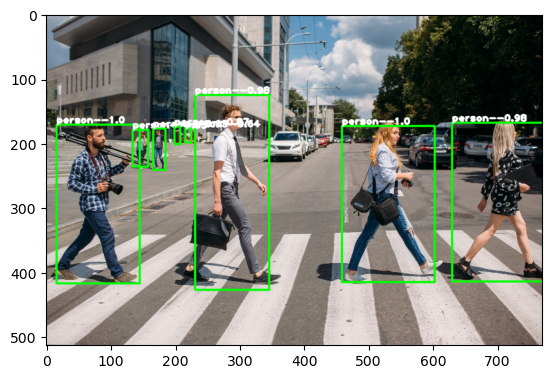

In [19]:
plt.imshow(image[:,:,::-1])

- Finding the distance between Pedestrains:

In [ ]:
#     x1,y1 = distance[0] , distance[1]
#     x2,y2 = distance[2] , distance[3]
#     dis = np.sqrt((x2-x1) ** 2 + (y2-y1) ** 2)
#     dis_line = cv2.line(image , (x1,y1) , (x2,y2) , (255,0,0) , 2)
#     cv2.putText(image,'distance :' + str(dis) , (30 ,40) , font,1,(0,0,255),1,cv2.LINE_AA)

In [56]:

Threshold = 0.5
image_size = 320

b = []

def predictions(final_box , cordinates , confidence_score , ids ,width_ratio,height_ratio):
    count1 = 0
    count2 = 0
    k = []
    c = []
    distance = []
    mid_point = []
    
    for i in final_box.flatten():
        if classes_names[ids[i]] == 'person':
           # print(cordinates[i])
            count2+=1
            c.append(count2)
            x , y , w , h = cordinates[i]
            x = int(x * width_ratio)
            y = int(y * height_ratio)
            w = int(w * width_ratio)
            h = int(h * height_ratio)
            font = cv2.FONT_HERSHEY_PLAIN
            cnf = str(round(confidence_score[i] , 2))
            text = str(classes_names[ids[i]])+'-'+cnf
            
            # finding distance between labels:
            distance.append(x)
            distance.append(y)
            cv2.circle(image , (x,y) , 3 , (0,255,0),2,cv2.LINE_AA)
            
            cv2.circle(image , (x+w , y+h) , 3 , (255,0,255) , 2)
            cv2.putText(image , str(x+w)+' '+str(y+h) , (x+w,y+h) , font , 1 , (0,255,0),2,cv2.LINE_8)
            
            cv2.rectangle(image , (x,y) , (x+w , y+h) , (0,0,255) , 2)
            cv2.putText(image,text , (x ,y-2) , font,1,(255,255,255),1,cv2.LINE_AA)
            cv2.putText(image, str(x)+' '+str(y), (x ,y-10) , font,1,(0,255,255),1,cv2.LINE_AA)
            
            
            
            
            print('x is : ' , x , 'Y is :' , y)
            print('x+w is :',x+w , 'y+h is :',y+h)
            
            dist1 = (x+w) - x
            dist1 = dist1 // 2
            dist1 = x + dist1
            
            dist2 = (y + h) - y
            dist2 = dist2 // 2
            dist2 = y + dist2
            mid_point.append(dist1)
            mid_point.append(dist2)
            
            
            print('dist1 :',dist1)
            print('dist2 : ',dist2)
            cv2.circle(image , (dist1,dist2) , 3 , (0,255,0),2,cv2.LINE_AA)
            cv2.putText(image,str(dist1)+' '+str(dist2) , (dist1 ,dist2) , font,1,(255,0,255),1,cv2.LINE_AA)
            
    
    x1,y1 = distance[0] , distance[1]
    x2,y2 = distance[2] , distance[3]
    dis = np.sqrt((x2-x1) ** 2 + (y2-y1) ** 2)
    dis_line = cv2.line(image , (x1,y1) , (x2,y2) , (255,0,0) , 2)
    cv2.putText(image,'Left corner distance :' + str(dis) , (30 ,50) , font,2,(255,0,0),1,cv2.LINE_AA)
    
    
    x1,y1 = mid_point[0] , mid_point[1]
    x2,y2 = mid_point[2] , mid_point[3]
    dis = np.sqrt((x2-x1) ** 2 + (y2-y1) ** 2)
    dis_line = cv2.line(image , (x1,y1) , (x2,y2) , (255,0,0) , 2)
    cv2.putText(image,'center distance :' + str(dis) , (30 ,70) , font,2,(255,0,0),1,cv2.LINE_AA)
    
    
    
    if len(c) > 0:
        font = cv2.FONT_HERSHEY_PLAIN
        text1 = 'Total Persons : {}'.format(c[-1])
        cv2.putText(image , text1 , (200,25) , font,1,(0,0,255),1,cv2.LINE_4) 
    else:
        c.append(0)
        font = cv2.FONT_HERSHEY_PLAIN
        text1 = 'Total Persons : {}'.format(c[-1])
        cv2.putText(image , text1 , (200,25) , font,1,(0,0,255),1,cv2.LINE_4) 

        
        
def bounding_box(detections):
    confidence_score = []
    ids = []
    cordinates = []
    
    
    for i in detections:
        for j in i:
            probs_values = j[5:]
            class_ = np.argmax(probs_values)
            confidence_ = probs_values[class_]
            
            if confidence_ > Threshold:
                w , h = int(j[2] * image_size) , int(j[3] * image_size)
                x , y = int(j[0] * image_size - w / 2) , int(j[1] * image_size - h / 2)
                cordinates.append([x,y,w,h])
                ids.append(class_)
                confidence_score.append(confidence_)
    final_box = cv2.dnn.NMSBoxes(cordinates , confidence_score , Threshold , .6)
    return final_box , cordinates , confidence_score , ids


image = cv2.imread('./testing images/test_1.jpg')
#cv2.imshow('image',image)
#cv2.waitKey()
#cv2.destroyAllWindows()
original_width , original_height = image.shape[1] , image.shape[0]

Neural_Network = cv2.dnn.readNetFromDarknet('./Files/yolov3.cfg','./Files/yolov3.weights')
classes_names = []
k = open('./Files/class_names','r')
for i in k.readlines():
    classes_names.append(i.strip())
#print(classes_names)
blob = cv2.dnn.blobFromImage(image , 1/255 , (320,320) , True , crop = False)
#print(blob.shape)
Neural_Network.setInput(blob)
cfg_data = Neural_Network.getLayerNames()
#print(cfg_data)
layer_names = Neural_Network.getUnconnectedOutLayers()
outputs = [cfg_data[i-1] for i in layer_names]
#print(outputs)
output_data = Neural_Network.forward(outputs)

                
        
    
final_box , cordinates , confidence_score , ids = bounding_box(output_data)   
predictions(final_box , cordinates , confidence_score , ids ,original_width / 320,original_height / 320 )    



x is :  46 Y is : 189
x+w is : 168 y+h is : 371
dist1 : 107
dist2 :  280
x is :  172 Y is : 208
x+w is : 182 y+h is : 235
dist1 : 177
dist2 :  221


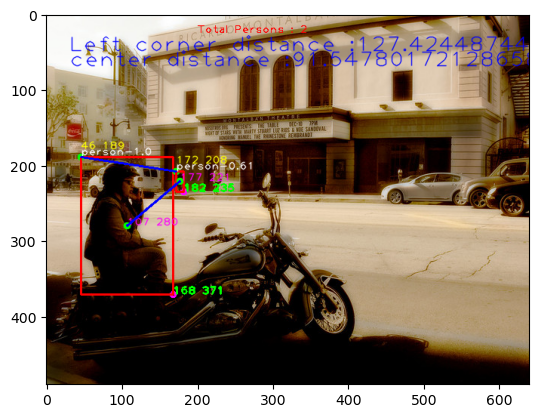

In [57]:

plt.imshow(image[:,:,::-1])

In [40]:
46 + 61

107

In [39]:
122 // 2

61

   - Detections for specified labels and the count of each label we specify in Videos

In [25]:


Threshold = 0.5
image_size = 320

total_persons_detected = []
total_cars_detected = []


def predictions(frame , final_box , cordinates , confidence_score , ids ,width_ratio,height_ratio):
    c = []
    k = []
    count1 = 0
    count2 = 0
    if len(final_box) > 0:
        for i in final_box.flatten():
            if classes_names[ids[i]] == 'car':
                count1+=1
                k.append(count1)
                
                x , y , w , h = cordinates[i]
                x = int(x * width_ratio)
                y = int(y * height_ratio)
                w = int(w * width_ratio)
                h = int(h * height_ratio)
                font = cv2.FONT_HERSHEY_COMPLEX_SMALL
                cnf = str(round(confidence_score[i] , 2))
                text = str(classes_names[ids[i]])+'-'+cnf+'%'
                cv2.rectangle(frame , (x,y) , (x+w,y+h) , (0,255,0),2,cv2.LINE_AA)
                cv2.putText(frame,text , (x ,y-2) , font,1,(255,255,255),1,cv2.LINE_AA)
            if classes_names[ids[i]] == 'person':
                count2+=1
                c.append(count2)
                x , y , w , h = cordinates[i]
                x = int(x * width_ratio)
                y = int(y * height_ratio)
                w = int(w * width_ratio)
                h = int(h * height_ratio)
                font = cv2.FONT_HERSHEY_COMPLEX_SMALL
                cnf = str(round(confidence_score[i] , 2))
                text = str(classes_names[ids[i]])+'-'+cnf
                cv2.rectangle(frame , (x,y) , (x+w,y+h) , (0,255,0),2,cv2.LINE_AA)
                cv2.putText(frame,text , (x ,y-2) , font,1,(255,255,255),1,cv2.LINE_AA)
        if len(k) > 0:
            text1 = 'Total cars : {}'.format(k[-1])
            cv2.putText(frame , text1 , (10,25) , font,1,(255,255,0),1,cv2.LINE_4) 
        else:
            k.append(0)
            text1 = 'Total cars : {}'.format(k[-1])
            cv2.putText(frame , text1 , (10,25) , font,1,(255,255,0),1,cv2.LINE_4) 
        
        if len(c) > 0:
            text1 = 'Total Persons : {}'.format(c[-1])
            cv2.putText(frame , text1 , (200,25) , font,1,(0,0,255),1,cv2.LINE_4) 
        else:
            c.append(0)
            text1 = 'Total Persons : {}'.format(c[-1])
            cv2.putText(frame , text1 , (200,25) , font,1,(0,0,255),1,cv2.LINE_4) 
        

        print('cars = ',len(k))
        print('persons = ',len(c))

def bounding_box(detections):
    confidence_score = []
    ids = []
    cordinates = []
    
    
    for i in detections:
        for j in i:
            probs_values = j[5:]
            class_ = np.argmax(probs_values)
            confidence_ = probs_values[class_]
            
            if confidence_ > Threshold:
                w , h = int(j[2] * image_size) , int(j[3] * image_size)
                x , y = int(j[0] * image_size - w / 2) , int(j[1] * image_size - h / 2)
                cordinates.append([x,y,w,h])
                ids.append(class_)
                confidence_score.append(confidence_)
    final_box = cv2.dnn.NMSBoxes(cordinates , confidence_score , Threshold , .6)
    return final_box , cordinates , confidence_score , ids


cap = cv2.VideoCapture('./testing images/yolo_test.mp4')

#image = cv2.imread('./testing images/test_2.jpg')
#cv2.imshow('image',image)
#cv2.waitKey()
#cv2.destroyAllWindows()

while(cap.isOpened()):
    res , frame = cap.read()
    if res == True:
        original_width , original_height = frame.shape[1] , frame.shape[0]

        Neural_Network = cv2.dnn.readNetFromDarknet('./Files/yolov3.cfg','./Files/yolov3.weights')
        classes_names = []
        k = open('./Files/class_names','r')
        for i in k.readlines():
            classes_names.append(i.strip())
            #print(classes_names)
        blob = cv2.dnn.blobFromImage(frame , 1/255 , (320,320) , True , crop = False)
            #print(blob.shape)
        Neural_Network.setInput(blob)
        cfg_data = Neural_Network.getLayerNames()
            #print(cfg_data)
        layer_names = Neural_Network.getUnconnectedOutLayers()
        outputs = [cfg_data[i-1] for i in layer_names]
            #print(outputs)
        output_data = Neural_Network.forward(outputs)
        final_box , cordinates , confidence_score , ids = bounding_box(output_data)   
        predictions(frame , final_box , cordinates , confidence_score , ids ,original_width / 320,original_height / 320 )    
        cv2.imshow('frame' , frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
        
cap.release()
cv2.destroyAllWindows()

cars =  1
persons =  6
cars =  1
persons =  3
cars =  1
persons =  4
cars =  1
persons =  4
cars =  2
persons =  4
cars =  2
persons =  4
cars =  3
persons =  4
cars =  1
persons =  4
cars =  3
persons =  4
cars =  1
persons =  5
cars =  1
persons =  7
cars =  1
persons =  6
cars =  1
persons =  6
cars =  1
persons =  5
cars =  1
persons =  6
cars =  1
persons =  8
cars =  1
persons =  7
cars =  1
persons =  8
cars =  1
persons =  8
cars =  1
persons =  8


- showing results in Different window 

In [26]:


Threshold = 0.5
image_size = 320


def predictions(img , frame , final_box , cordinates , confidence_score , ids ,width_ratio,height_ratio):
    total_persons_detected = []
    total_cars_detected = []
    
    c = []
    k = []
    count1 = 0
    count2 = 0
    if len(final_box) > 0:
        for i in final_box.flatten():
            if classes_names[ids[i]] == 'car':
                count1+=1
                k.append(count1)
                
                x , y , w , h = cordinates[i]
                x = int(x * width_ratio)
                y = int(y * height_ratio)
                w = int(w * width_ratio)
                h = int(h * height_ratio)
                font = cv2.FONT_HERSHEY_COMPLEX_SMALL
                cnf = str(round(confidence_score[i] , 2))
                text = str(classes_names[ids[i]])+'-'+cnf+'%'
                cv2.rectangle(frame , (x,y) , (x+w,y+h) , (0,255,0),2,cv2.LINE_AA)
                cv2.putText(frame,text , (x ,y-2) , font,1,(255,255,255),1,cv2.LINE_AA)
            if classes_names[ids[i]] == 'person':
                count2+=1
                c.append(count2)
                x , y , w , h = cordinates[i]
                x = int(x * width_ratio)
                y = int(y * height_ratio)
                w = int(w * width_ratio)
                h = int(h * height_ratio)
                font = cv2.FONT_HERSHEY_COMPLEX_SMALL
                cnf = str(round(confidence_score[i] , 2))
                text = str(classes_names[ids[i]])+'-'+cnf
                cv2.rectangle(frame , (x,y) , (x+w,y+h) , (0,255,0),2,cv2.LINE_AA)
                cv2.putText(frame,text , (x ,y-2) , font,1,(255,255,255),1,cv2.LINE_AA)
        if len(k) > 0:
            text1 = 'Total cars : {}'.format(k[-1])
            cv2.putText(img , text1 , (10,25) , font,1,(255,255,0),1,cv2.LINE_4) 
        else:
            k.append(0)
            text1 = 'Total cars : {}'.format(k[-1])
            cv2.putText(img , text1 , (10,25) , font,1,(255,255,0),1,cv2.LINE_4) 
        
        if len(c) > 0:
            text1 = 'Total Persons : {}'.format(c[-1])
            cv2.putText(img , text1 , (200,25) , font,1,(0,0,255),1,cv2.LINE_4) 
        else:
            c.append(0)
            text1 = 'Total Persons : {}'.format(c[-1])
            cv2.putText(img , text1 , (200,25) , font,1,(0,0,255),1,cv2.LINE_4) 
        

        print('cars = ',len(k))
        print('persons = ',len(c))

def bounding_box(detections):
    confidence_score = []
    ids = []
    cordinates = []
    
    
    for i in detections:
        for j in i:
            probs_values = j[5:]
            class_ = np.argmax(probs_values)
            confidence_ = probs_values[class_]
            
            if confidence_ > Threshold:
                w , h = int(j[2] * image_size) , int(j[3] * image_size)
                x , y = int(j[0] * image_size - w / 2) , int(j[1] * image_size - h / 2)
                cordinates.append([x,y,w,h])
                ids.append(class_)
                confidence_score.append(confidence_)
    final_box = cv2.dnn.NMSBoxes(cordinates , confidence_score , Threshold , .6)
    return final_box , cordinates , confidence_score , ids


cap = cv2.VideoCapture('./testing images/yolo_test.mp4')

#image = cv2.imread('./testing images/test_2.jpg')
#cv2.imshow('image',image)
#cv2.waitKey()
#cv2.destroyAllWindows()

while(cap.isOpened()):
    res , frame = cap.read()
    if res == True:
        img = np.zeros([512,512,3] , dtype = 'uint8')
        original_width , original_height = frame.shape[1] , frame.shape[0]

        Neural_Network = cv2.dnn.readNetFromDarknet('./Files/yolov3.cfg','./Files/yolov3.weights')
        classes_names = []
        k = open('./Files/class_names','r')
        for i in k.readlines():
            classes_names.append(i.strip())
            #print(classes_names)
        blob = cv2.dnn.blobFromImage(frame , 1/255 , (320,320) , True , crop = False)
            #print(blob.shape)
        Neural_Network.setInput(blob)
        cfg_data = Neural_Network.getLayerNames()
            #print(cfg_data)
        layer_names = Neural_Network.getUnconnectedOutLayers()
        outputs = [cfg_data[i-1] for i in layer_names]
            #print(outputs)
        output_data = Neural_Network.forward(outputs)
        final_box , cordinates , confidence_score , ids = bounding_box(output_data)   
        predictions(img , frame , final_box , cordinates , confidence_score , ids ,original_width / 320,original_height / 320 )    
        cv2.imshow('frames',frame)
        cv2.imshow('report' , img)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
        
cap.release()
cv2.destroyAllWindows()

cars =  1
persons =  6
cars =  1
persons =  3
cars =  1
persons =  4
cars =  1
persons =  4
cars =  2
persons =  4
cars =  2
persons =  4
cars =  3
persons =  4
cars =  1
persons =  4
cars =  3
persons =  4
cars =  1
persons =  5
cars =  1
persons =  7
cars =  1
persons =  6
cars =  1
persons =  6
cars =  1
persons =  5
cars =  1
persons =  6
cars =  1
persons =  8
cars =  1
persons =  7
cars =  1
persons =  8
cars =  1
persons =  8
cars =  1
persons =  8
cars =  1
persons =  8
cars =  1
persons =  9
cars =  1
persons =  9
cars =  1
persons =  6
cars =  2
persons =  6
cars =  2
persons =  6
cars =  2
persons =  6
cars =  2
persons =  6
cars =  2
persons =  5
cars =  1
persons =  5
cars =  1
persons =  5
cars =  1
persons =  6
cars =  1
persons =  6
cars =  1
persons =  5


### Information after NMS 

In [174]:
final_box

array([ 1, 19, 11,  2,  8,  4, 24])

In [175]:
cordinates

[[7, 85, 167, 202],
 [20, 85, 168, 204],
 [130, 103, 101, 148],
 [130, 92, 96, 163],
 [151, 105, 105, 135],
 [189, 106, 93, 123],
 [8, 96, 167, 203],
 [19, 95, 165, 207],
 [63, 56, 28, 64],
 [65, 59, 31, 61],
 [252, 79, 68, 91],
 [254, 99, 64, 70],
 [254, 97, 64, 72],
 [256, 97, 65, 72],
 [257, 96, 63, 75],
 [196, 100, 77, 117],
 [213, 99, 64, 118],
 [148, 84, 76, 176],
 [158, 92, 76, 158],
 [194, 102, 81, 131],
 [210, 102, 67, 130],
 [145, 98, 82, 164],
 [159, 107, 72, 147],
 [195, 113, 77, 128],
 [30, 67, 16, 31]]

In [176]:
confidence_score

[0.9920456,
 0.9977345,
 0.98344755,
 0.98342526,
 0.56871825,
 0.9468183,
 0.9953521,
 0.9973766,
 0.9758986,
 0.80467105,
 0.50501835,
 0.9839735,
 0.9803726,
 0.9519359,
 0.95920897,
 0.8849582,
 0.8243992,
 0.9492507,
 0.74060935,
 0.99752367,
 0.9892196,
 0.97391164,
 0.7255947,
 0.82369107,
 0.55263615]

In [177]:
ids

[3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0]